Implement Otsu's Threshold method for binarizing a given greyscale image with an intensity range of [0,255]. The output binary image should have only two intensity options, 0 and 1/255. Add Gaussian noise to the input greyscale image of varying variance and report the results.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import cv2 as cv
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Function to make the histogram of an image

In [ ]:
#To find intensity of an image:
def intensity(img):
  h,w=img.shape
  l=[]
  for i in range(h):
    for j in range(w):
      l.append(img[i,j])
  return l

Function to calculate the total no. of pixel for each intensity present in the image

In [ ]:
#finding the freq. for each intensity
def countpixel(img,h,w):
  pixel=[0 for i in range(256)]
  for i in range(h):
    for j in range(w):
      pixel[img[i,j]]+=1
  return pixel

Function to calculate the within variance. I am first finding the pdf of each pixel. Then, I will make two classes, foreground and background, which are w1 and w2. those are the summation of pdf for pixel< t and pixel>=t. s11 and s12 are summation of pixel for less than thresold and greater than thresold. Then, I am calculating the mean and then sigma from that we will get the value of within variance.

In [ ]:
#calculating the within class the variance
def withinv(img,h,w,t):
  c1=[]
  pixel1=countpixel(img,h,w)
  for i in range(len(pixel1)):
    c1.append(pixel1[i]/np.sum(pixel1))
  w11=np.sum(c1[:t])
  w12=np.sum(c1[t:])
  s11=0
  s12=0
  mean11=0
  mean12=0
  for i in range(0,t):
    s11+=pixel1[i]
  for i in range(t,len(pixel1)):
    s12+=pixel1[i]
  #calculating the mean
  for i in range(0,t):
      mean11+=(i*pixel1[i])/s11
  for i in range(t,len(pixel1)):
      mean12+=(i*pixel1[i])/s12
  sigma11=0
  sigma12=0
  for i in range(0,t):
    sigma11+=(((i-mean11)**2)*pixel1[i])/s11
  for i in range(t,len(pixel1)):
    sigma12+=(((i-mean12)**2)*pixel1[i])/s12
  #within class variance
  Vw=w11*sigma11+w12*sigma12
  return Vw

Function to calculate between variance. The same way in which we did for within variance. And just the last formula is different for between variance.

In [ ]:
#between class variance
def betweenv(img,h,w,t):
  c2=[]
  pixel2=countpixel(img,h,w)
  for i in range(len(pixel2)):
    c2.append(pixel2[i]/np.sum(pixel2))
  w12=np.sum(c2[:t])
  w22=np.sum(c2[t:])
  s12=0
  s22=0
  mean12=0
  mean22=0
  for i in range(0,t):
    s12+=pixel2[i]
  for i in range(t,len(pixel2)):
    s22+=pixel2[i]
  #calculating the mean
  for i in range(0,t):
      mean12+=(i*pixel2[i])/s12
  for i in range(t,len(pixel2)):
      mean22+=(i*pixel2[i])/s22
  Vb=w12*w22*((mean12-mean22)**2)
  return Vb

The function is to find the threshold for which within-class variance is minimum. I am listing all the values within values and finding their minimum and index.

In [ ]:
#finding thresold for minimum value of the within class variance
def mininum(img,h,w):
  lucky=[]
  for i in range(0,256):
    Vw=withinv(img,h,w,i)
    lucky.append(Vw)
  minVw=min(lucky)
  t=lucky.index(minVw)
  f_l=[]
  for i in range(0,256):
    if i<t:
      f_l.append(0)
    else:
      f_l.append(1)
  lol=np.zeros((h,w))
  for i in range(h):
    for j in range(w):
        lol[i,j]=f_l[img[i,j]]
  return lucky,lol

The function is to find the threshold for which between class variance is maximum. I am listing all the values beetwen values and finding their maximum and index.

In [ ]:
#finding thresold for minimum value of the between class variance
def maxi(img,h,w):
  pq=[]
  for i in range(0,256):
    Vb=betweenv(img,h,w,i)
    pq.append(Vb)
  maxVb=max(pq)
  t=pq.index(maxVb)
  f_l=[]
  for i in range(0,256):
    if i<t:
      f_l.append(0)
    else:
      f_l.append(1)
  x=np.zeros((h,w))
  for i in range(h):
    for j in range(w):
        x[i,j]=f_l[img[i,j]]
  return x,pq

In [ ]:
img1 = cv.imread('/content/drive/MyDrive/lab6_prob/bookpage_1.jpg',0)
img2= cv.imread('/content/drive/MyDrive/lab6_prob/bookpage_2.jpg',0)
img3= cv.imread('/content/drive/MyDrive/lab6_prob/panther.jpg',0)
img4= cv.imread('/content/drive/MyDrive/lab6_prob/tom.jpg',0)
h11,w11=img1.shape
h22,w22=img2.shape
h33,w33=img3.shape
h44,w44=img4.shape

ploting the graphs of actual image and adding gaussian noise in the image and plotting it using subplots function of matplotlib.

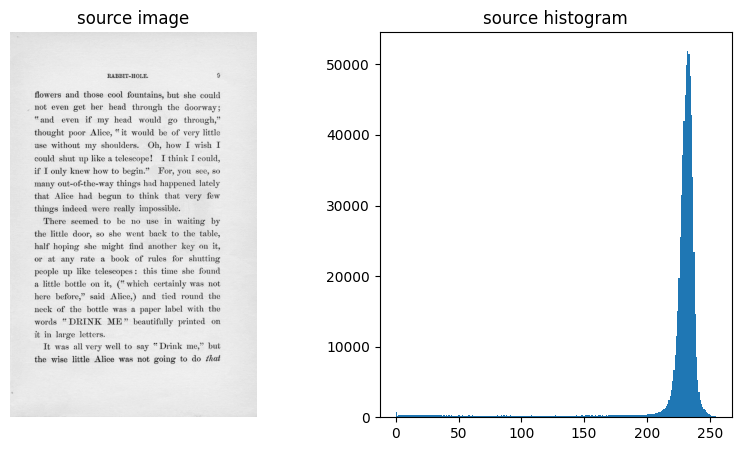

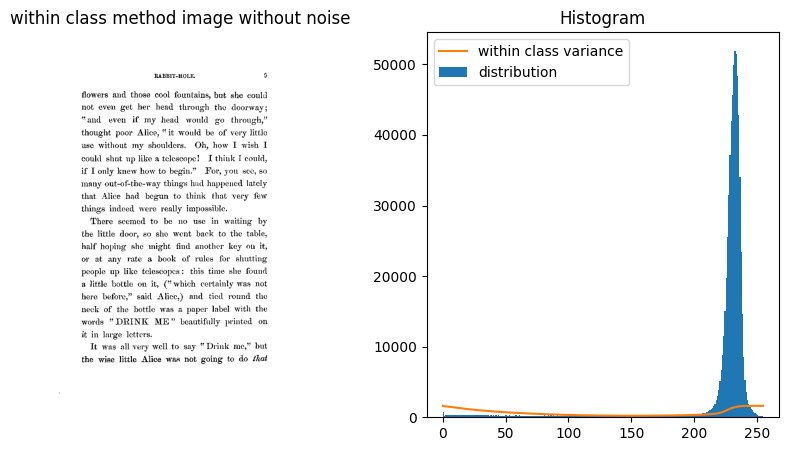

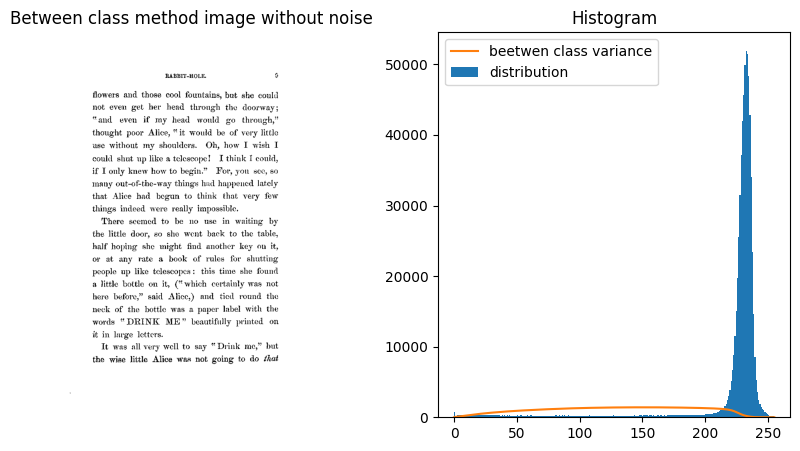

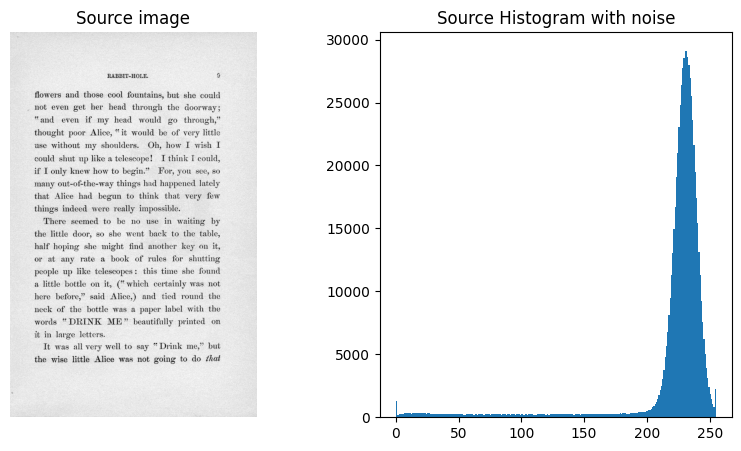

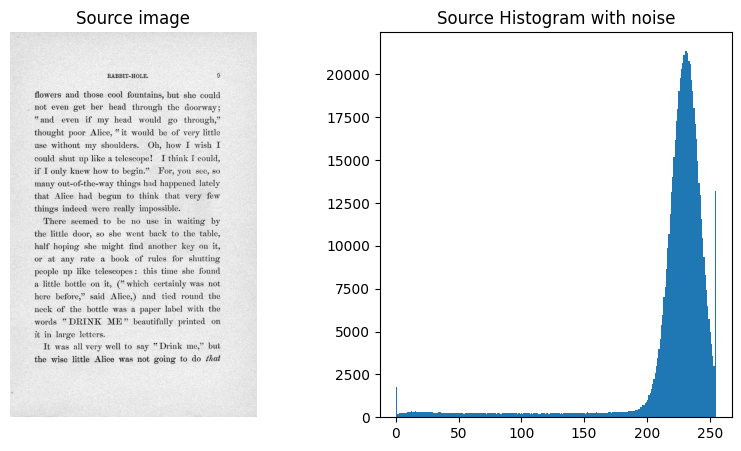

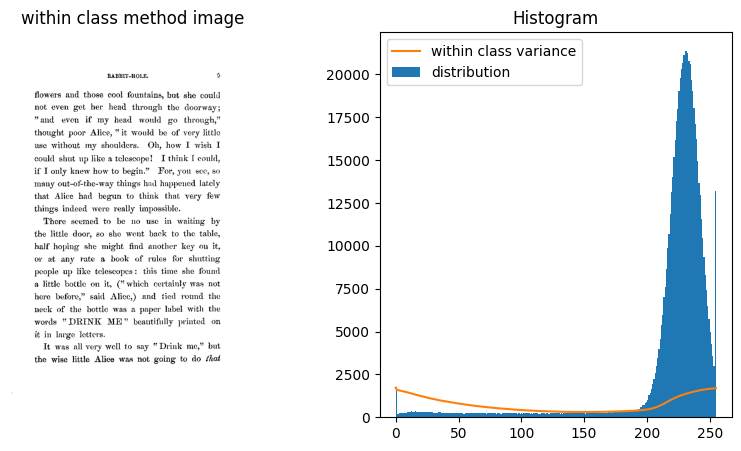

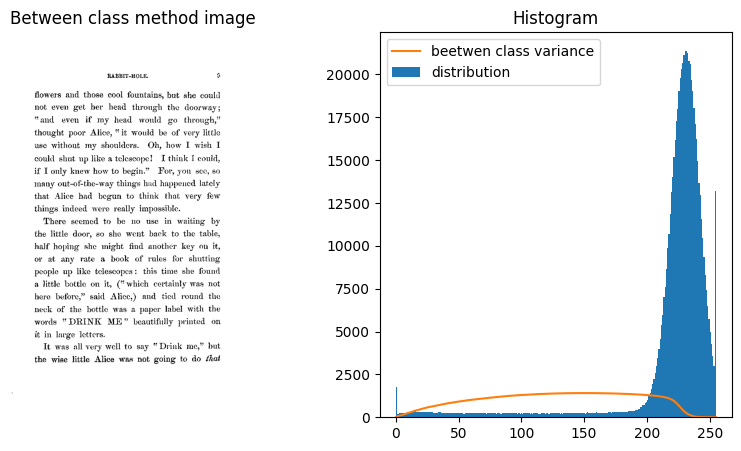

In [ ]:
y=intensity(img1)
p=np.arange(0,256)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
ax1.imshow(img1,cmap='gray')
ax1.axis('off')
ax1.title.set_text('source image')
ax2.hist(y,bins=256)
ax2.title.set_text('source histogram')
plt.show()

l11,x11=mininum(img1,h11,w11)
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(x11,cmap='gray')
ax[0].axis('off')
ax[0].title.set_text('within class method image without noise')
ax[1].hist(y,bins=256)
ax[1].title.set_text('Histogram')
ax[1].plot(p,l11)
ax[1].legend(['within class variance','distribution'])
plt.show()

x22,l22=maxi(img1,h11,w11)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
ax1.imshow(x22,cmap='gray')
ax1.axis('off')
ax1.title.set_text('Between class method image without noise')
ax2.hist(y,bins=256)
ax2.title.set_text('Histogram')
ax2.plot(p,l22)
ax2.legend(['beetwen class variance','distribution'])
plt.show()

#adding noise
variance=[45,105]
for i in variance:
  noise= np.random.normal(0,i**0.5,img1.shape) #noise is a 2D array with random numbers whose shape is as the image
  image_with_noise=img1+noise
  im1=np.clip(image_with_noise,0,255)
  im1=im1.astype('int32')
  l=intensity(im1)
  (h1,w1)=im1.shape
  fig,ax=plt.subplots(1,2,figsize=(10,5))
  ax[0].imshow(im1,cmap='gray')
  ax[0].axis('off')
  ax[0].title.set_text("Source image")
  ax[1].hist(l,bins=256)
  ax[1].title.set_text("Source Histogram with noise")
  plt.show()

l1,x1=mininum(im1,h1,w1)
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(x1,cmap='gray')
ax[0].axis('off')
ax[0].title.set_text('within class method image')
ax[1].hist(l,bins=256)
ax[1].title.set_text('Histogram')
ax[1].plot(p,l1)
ax[1].legend(['within class variance','distribution'])
plt.show()

x2,l2=maxi(img1,h1,w1)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
ax1.imshow(x2,cmap='gray')
ax1.axis('off')
ax1.title.set_text('Between class method image')
ax2.hist(l,bins=256)
ax2.title.set_text('Histogram')
ax2.plot(p,l2)
ax2.legend(['beetwen class variance','distribution'])
plt.show()


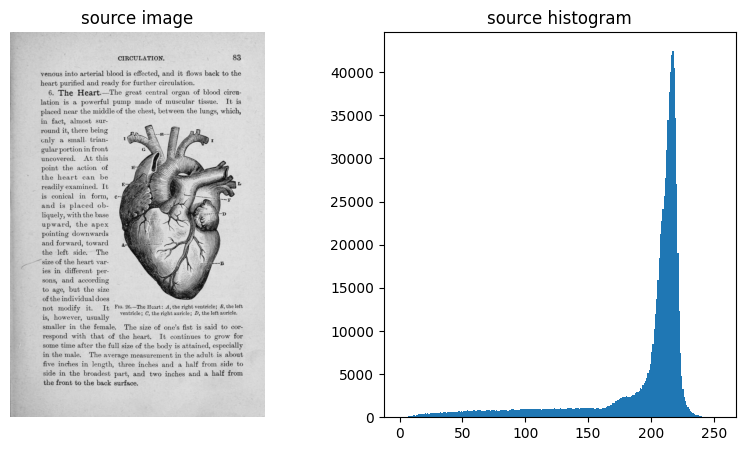

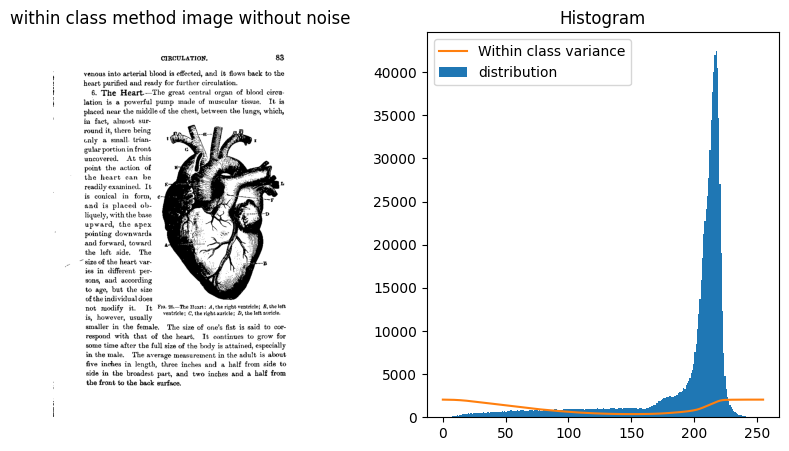

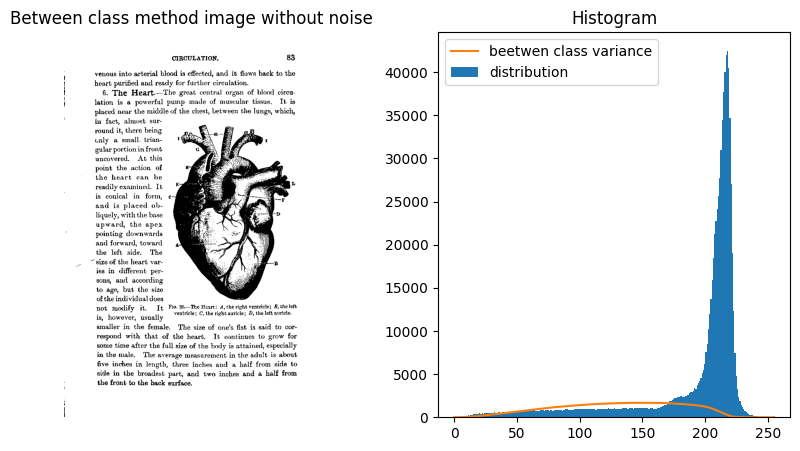

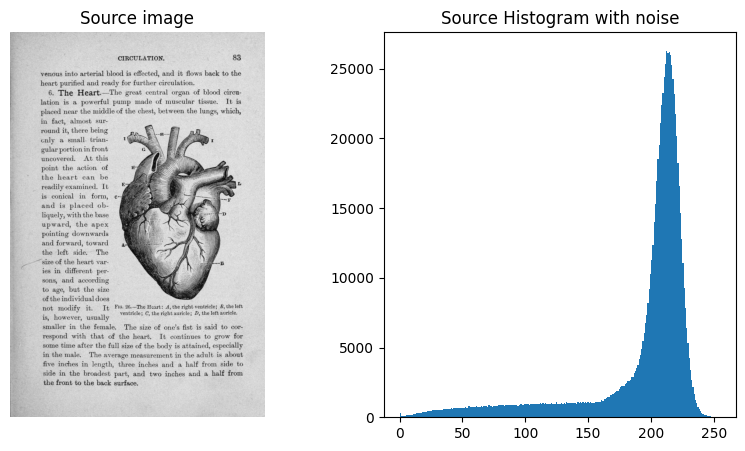

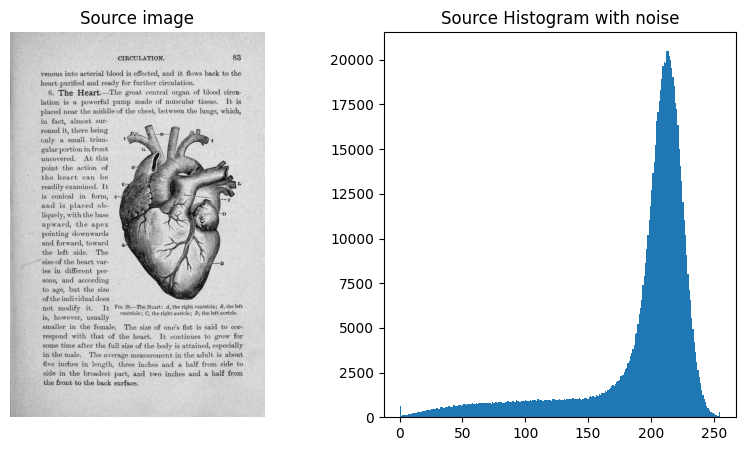

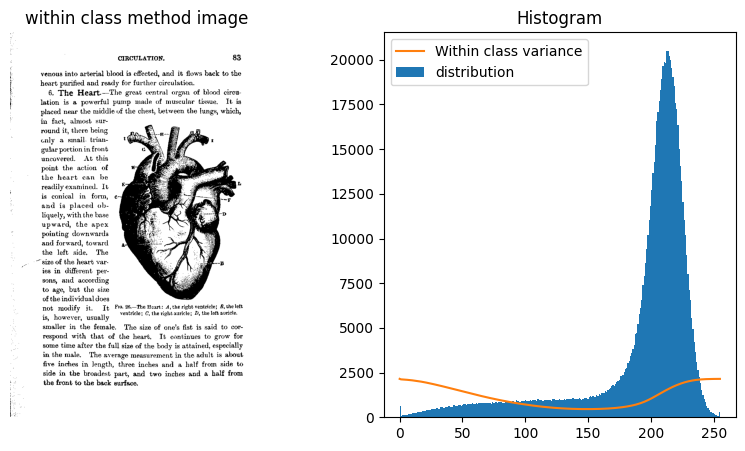

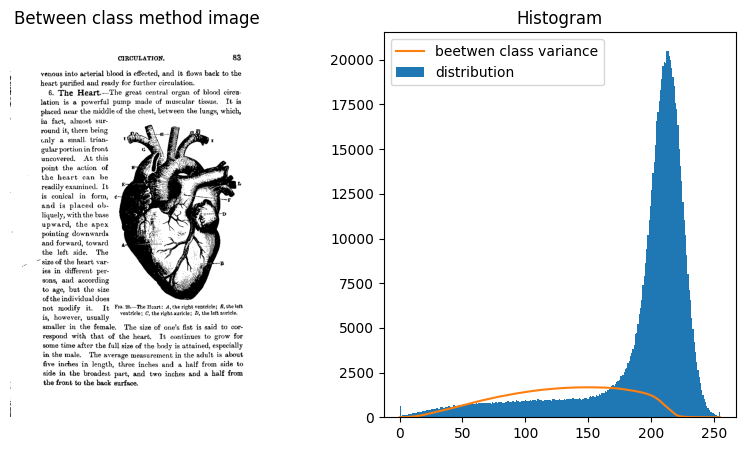

In [ ]:
y=intensity(img2)
p=np.arange(0,256)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
ax1.imshow(img2,cmap='gray')
ax1.axis('off')
ax1.title.set_text('source image')
ax2.hist(y,bins=256)
ax2.title.set_text('source histogram')
plt.show()

l44,x44=mininum(img2,h22,w22)
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(x44,cmap='gray')
ax[0].axis('off')
ax[0].title.set_text('within class method image without noise')
ax[1].hist(y,bins=256)
ax[1].title.set_text('Histogram')
ax[1].plot(p,l44)
ax[1].legend(['Within class variance','distribution'])
plt.show()

x55,l55=maxi(img2,h22,w22)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
ax1.imshow(x55,cmap='gray')
ax1.axis('off')
ax1.title.set_text('Between class method image without noise')
ax2.hist(y,bins=256)
ax2.title.set_text('Histogram')
ax2.plot(p,l55)
ax2.legend(['beetwen class variance','distribution'])
plt.show()

#adding noise
variance=[45,105]
for i in variance:
  noise= np.random.normal(0,i**0.5,img2.shape)
  image_with_noise=img2+noise
  im2=np.clip(image_with_noise,0,255)
  im2=im2.astype('int32')
  pic=intensity(im2)
  (h2,w2)=im2.shape
  fig,ax=plt.subplots(1,2,figsize=(10,5))
  ax[0].imshow(im2,cmap='gray')
  ax[0].axis('off')
  ax[0].title.set_text("Source image")
  ax[1].hist(pic,bins=256)
  ax[1].title.set_text("Source Histogram with noise")
  plt.show()

l4,x4=mininum(im2,h2,w2)
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(x4,cmap='gray')
ax[0].axis('off')
ax[0].title.set_text('within class method image')
ax[1].hist(pic,bins=256)
ax[1].title.set_text('Histogram')
ax[1].plot(p,l4)
ax[1].legend(['Within class variance','distribution'])
plt.show()

x5,l5=maxi(img2,h2,w2)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
ax1.imshow(x5,cmap='gray')
ax1.axis('off')
ax1.title.set_text('Between class method image')
ax2.hist(pic,bins=256)
ax2.title.set_text('Histogram')
ax2.plot(p,l5)
ax2.legend(['beetwen class variance','distribution'])
plt.show()


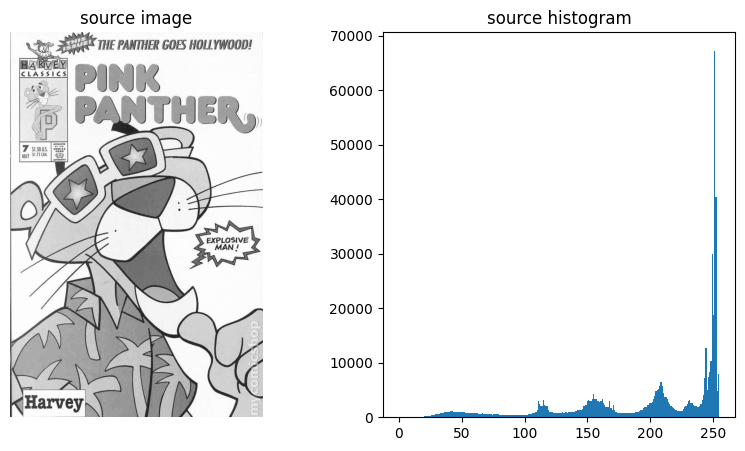

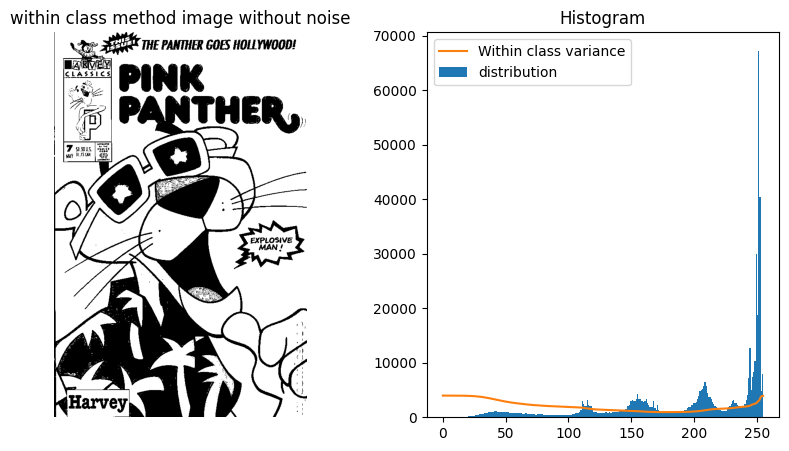

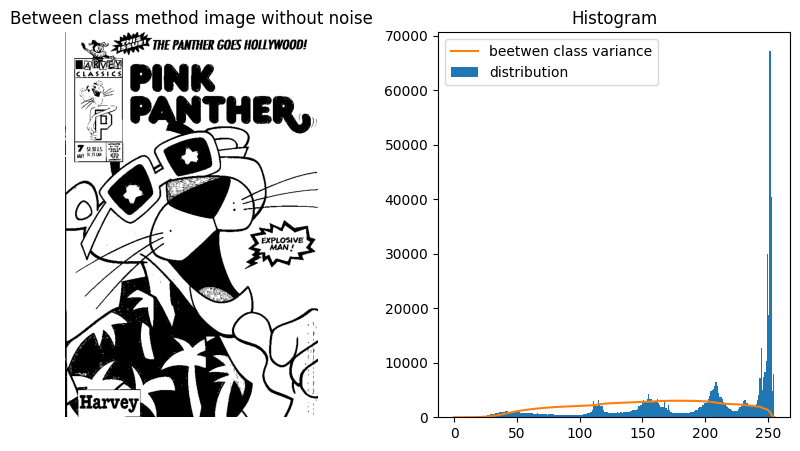

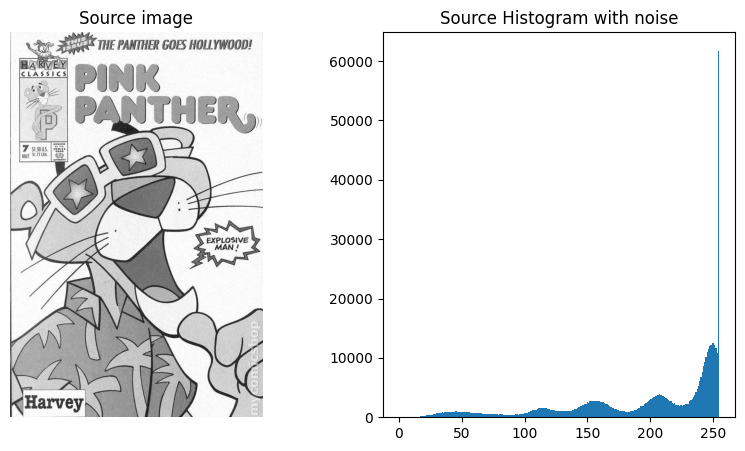

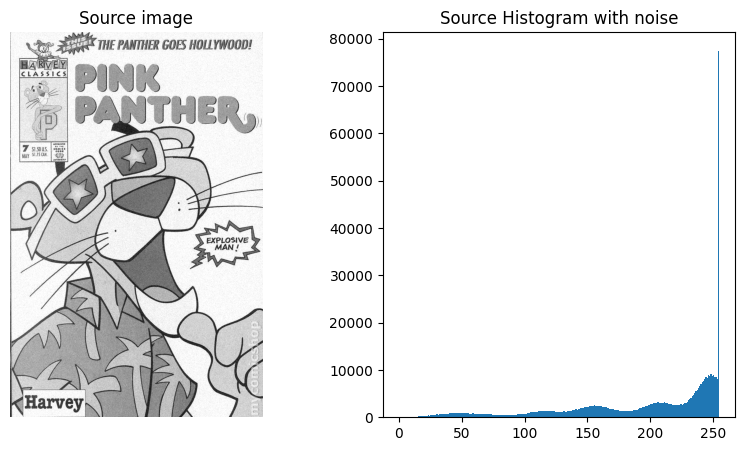

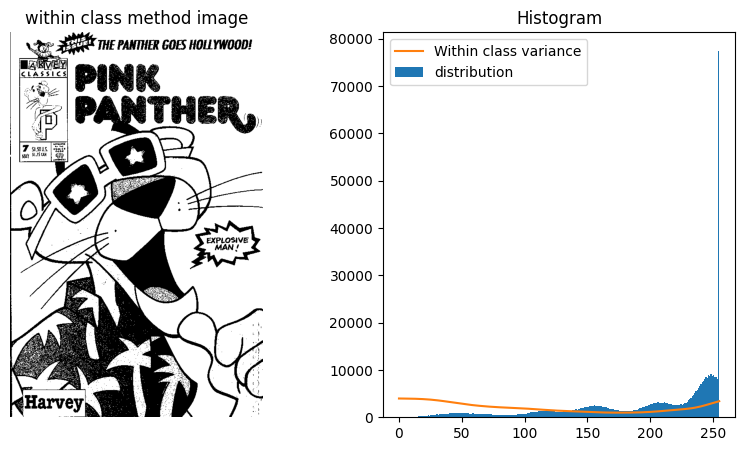

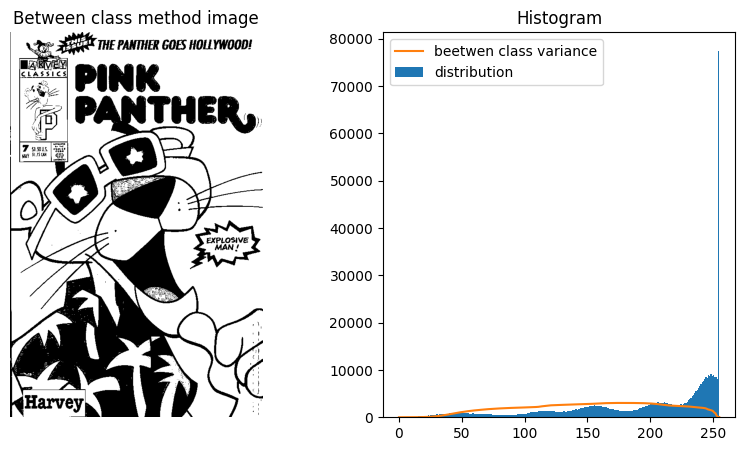

In [ ]:
y=intensity(img3)
p=np.arange(0,256)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
ax1.imshow(img3,cmap='gray')
ax1.axis('off')
ax1.title.set_text('source image')
ax2.hist(y,bins=256)
ax2.title.set_text('source histogram')
plt.show()

l66,x66=mininum(img3,h33,w33)
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(x66,cmap='gray')
ax[0].axis('off')
ax[0].title.set_text('within class method image without noise')
ax[1].hist(y,bins=256)
ax[1].title.set_text('Histogram')
ax[1].plot(p,l66)
ax[1].legend(['Within class variance','distribution'])
plt.show()

x77,l77=maxi(img3,h33,w33)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
ax1.imshow(x77,cmap='gray')
ax1.axis('off')
ax1.title.set_text('Between class method image without noise')
ax2.hist(y,bins=256)
ax2.title.set_text('Histogram')
ax2.plot(p,l77)
ax2.legend(['beetwen class variance','distribution'])
plt.show()

#adding noise
variance=[45,105]
for i in variance:
  noise= np.random.normal(0,i**0.5,img3.shape)
  image_with_noise=img3+noise
  im3=np.clip(image_with_noise,0,255)
  im3=im3.astype('int32')
  pic1=intensity(im3)
  (h3,w3)=im3.shape
  fig,ax=plt.subplots(1,2,figsize=(10,5))
  ax[0].imshow(im3,cmap='gray')
  ax[0].axis('off')
  ax[0].title.set_text("Source image")
  ax[1].hist(pic1,bins=256)
  ax[1].title.set_text("Source Histogram with noise")
  plt.show()

l6,x6=mininum(im3,h3,w3)
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(x6,cmap='gray')
ax[0].axis('off')
ax[0].title.set_text('within class method image')
ax[1].hist(pic1,bins=256)
ax[1].title.set_text('Histogram')
ax[1].plot(p,l6)
ax[1].legend(['Within class variance','distribution'])
plt.show()

x7,l7=maxi(img3,h3,w3)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
ax1.imshow(x7,cmap='gray')
ax1.axis('off')
ax1.title.set_text('Between class method image')
ax2.hist(pic1,bins=256)
ax2.title.set_text('Histogram')
ax2.plot(p,l7)
ax2.legend(['beetwen class variance','distribution'])
plt.show()


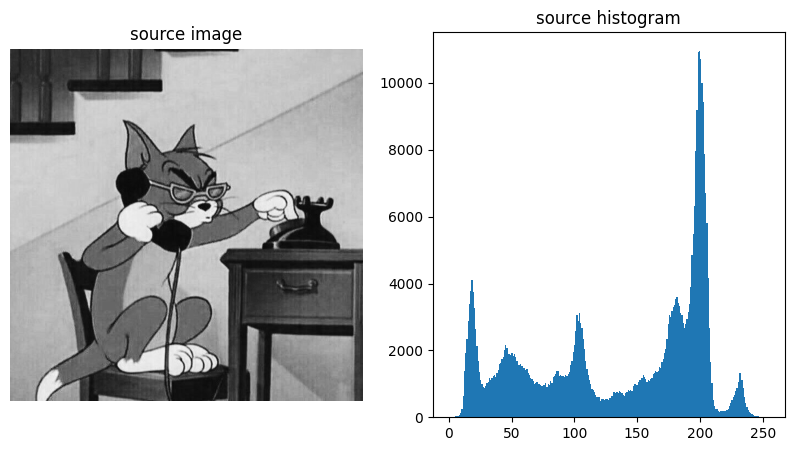

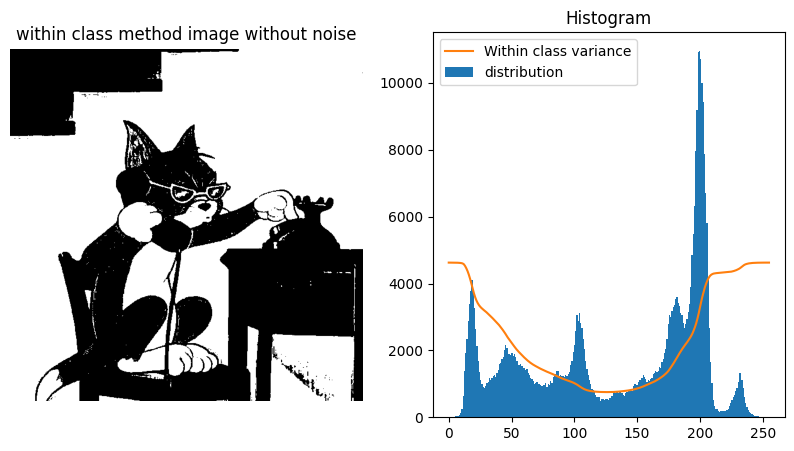

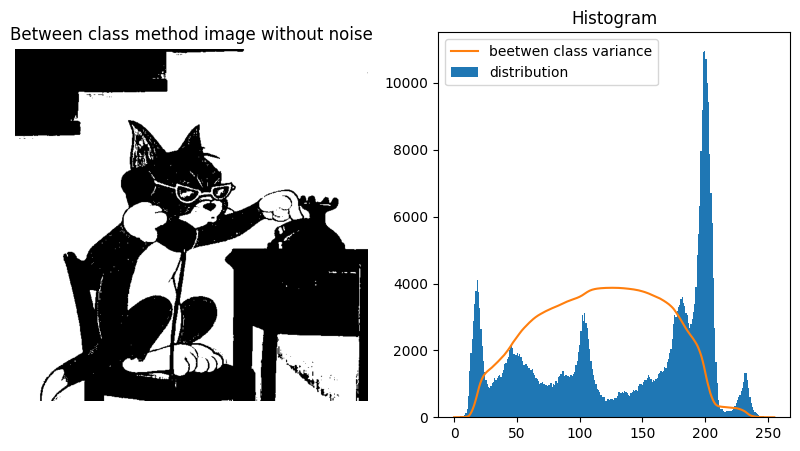

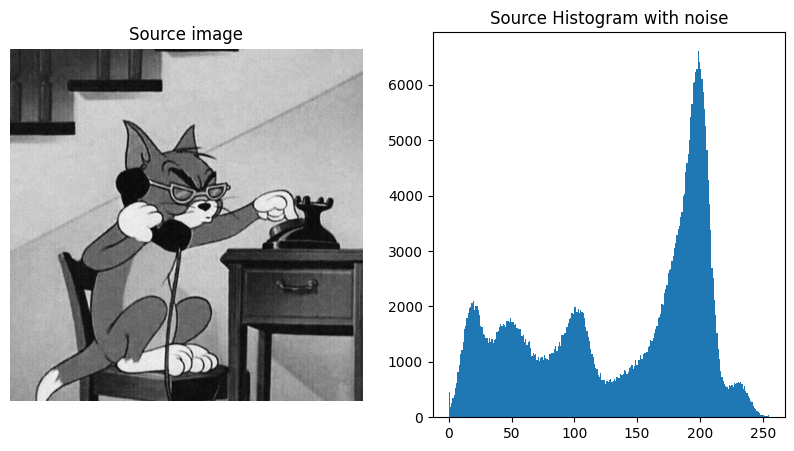

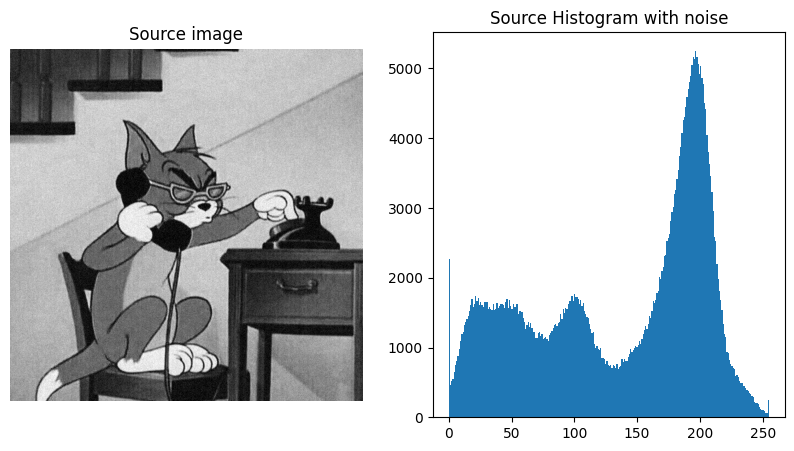

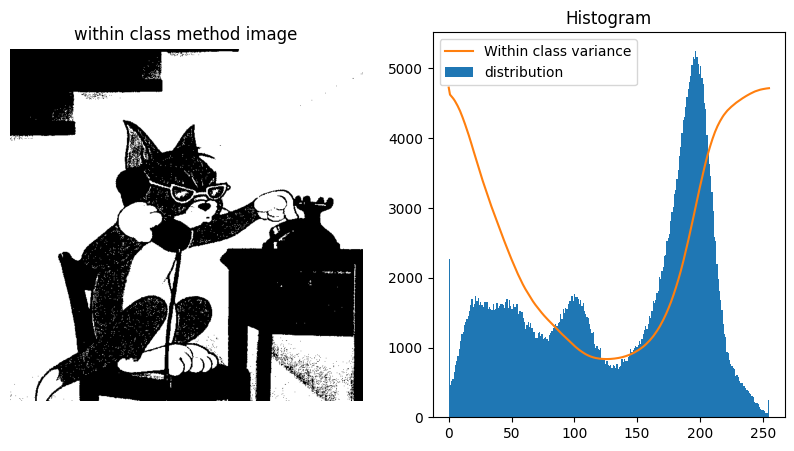

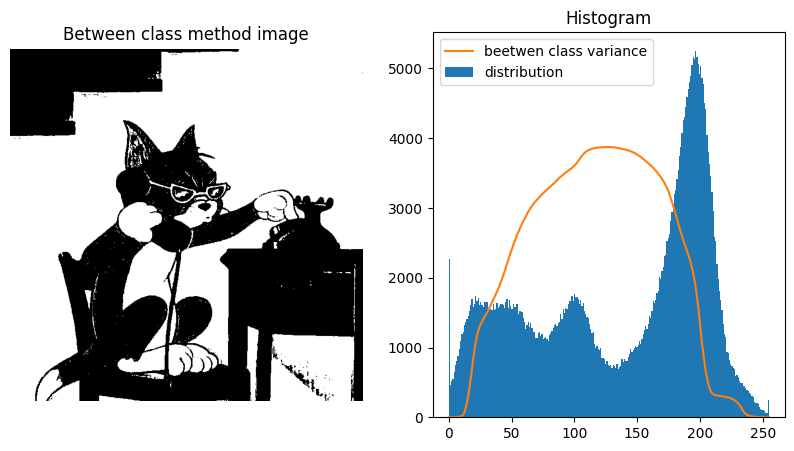

In [ ]:
y=intensity(img4)
p=np.arange(0,256)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
ax1.imshow(img4,cmap='gray')
ax1.axis('off')
ax1.title.set_text('source image')
ax2.hist(y,bins=256)
ax2.title.set_text('source histogram')
plt.show()

l88,x88=mininum(img4,h44,w44)
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(x88,cmap='gray')
ax[0].axis('off')
ax[0].title.set_text('within class method image without noise')
ax[1].hist(y,bins=256)
ax[1].title.set_text('Histogram')
ax[1].plot(p,l88)
ax[1].legend(['Within class variance','distribution'])
plt.show()

x99,l99=maxi(img4,h44,w44)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
ax1.imshow(x99,cmap='gray')
ax1.axis('off')
ax1.title.set_text('Between class method image without noise')
ax2.hist(y,bins=256)
ax2.title.set_text('Histogram')
ax2.plot(p,l99)
ax2.legend(['beetwen class variance','distribution'])
plt.show()

#adding noise
variance=[45,105]
for i in variance:
  noise= np.random.normal(0,i**0.5,img4.shape)
  image_with_noise=img4+noise
  im4=np.clip(image_with_noise,0,255)
  im4=im4.astype('int32')
  pic2=intensity(im4)
  (h4,w4)=im4.shape
  fig,ax=plt.subplots(1,2,figsize=(10,5))
  ax[0].imshow(im4,cmap='gray')
  ax[0].axis('off')
  ax[0].title.set_text("Source image")
  ax[1].hist(pic2,bins=256)
  ax[1].title.set_text("Source Histogram with noise")
  plt.show()

l8,x8=mininum(im4,h4,w4)
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(x8,cmap='gray')
ax[0].axis('off')
ax[0].title.set_text('within class method image')
ax[1].hist(pic2,bins=256)
ax[1].title.set_text('Histogram')
ax[1].plot(p,l8)
ax[1].legend(['Within class variance','distribution'])
plt.show()

x9,l9=maxi(img4,h4,w4)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
ax1.imshow(x9,cmap='gray')
ax1.axis('off')
ax1.title.set_text('Between class method image')
ax2.hist(pic2,bins=256)
ax2.title.set_text('Histogram')
ax2.plot(p,l9)
ax2.legend(['beetwen class variance','distribution'])
plt.show()


Sources :

[1] https://learnopencv.com/otsu-thresholding-with-opencv/

[2] https://en.wikipedia.org/wiki/Otsu%27s_method

[3] https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html